In [1]:
from keras.models import load_model
import os
from PIL import Image
from numpy import asarray
import numpy as np
from scipy.spatial.distance import cosine
from mtcnn.mtcnn import MTCNN
from keras_vggface.utils import preprocess_input
from matplotlib import pyplot
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [2]:
# extract a single face from a given photograph
def extract_face(filename, required_size=(224, 224)):
    # load image from file
    pixels = pyplot.imread(filename)
    # create the detector, using default weights
    detector = MTCNN()
    # detect faces in the image
    results = detector.detect_faces(pixels)
    # extract the bounding box from the first face
    x1, y1, width, height = results[0]['box']
    x2, y2 = x1 + width, y1 + height
    # extract the face
    face = pixels[y1:y2, x1:x2]
    # resize pixels to the model size
    image = Image.fromarray(face)
    image = image.resize(required_size)
    face_array = asarray(image)
    return face_array

In [3]:
# extract faces and calculate face embeddings for a list of photo files
iden = []
def get_embeddings(filenames):
    # extract faces
    array = []
    for f in filenames:
        iden.append(f)
        faces = extract_face('./dataset/' + f)
        # convert into an array of samples
        samples = asarray(faces, 'float32')
        # prepare the face for the model, e.g. center pixels
        samples = preprocess_input(samples, version=2)
        # perform prediction
        samples = samples.reshape(1,224,224,3)
        yhat = model.predict(samples)
        array.append(yhat)
    return array

In [4]:
# define filenames
filenames = os.listdir('./dataset/')
iden.clear()

model = load_model('face_recog.h5')
embeddings = get_embeddings(filenames)

C:\Users\anuj4\AppData\Local\conda\conda\envs\TF\lib\site-packages\keras\engine\saving.py:341: UserWarning: No training configuration found in save file: the model was *not* compiled. Compile it manually.
  warnings.warn('No training configuration found in save file: '


1
Anuj.jpg Matched with Anuj.jpg with 60.33%


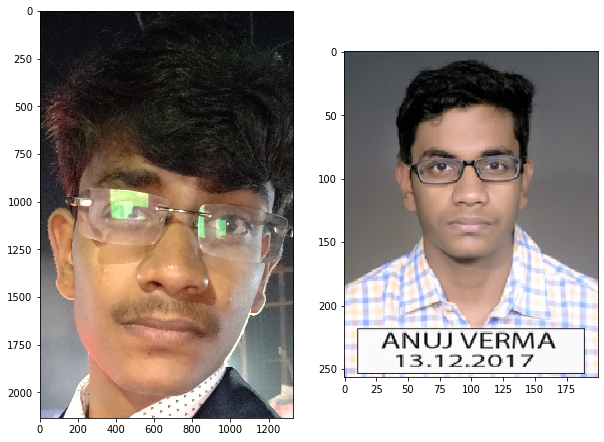



dhanu.jpeg Matched with dhanu.jpeg with 79.87%


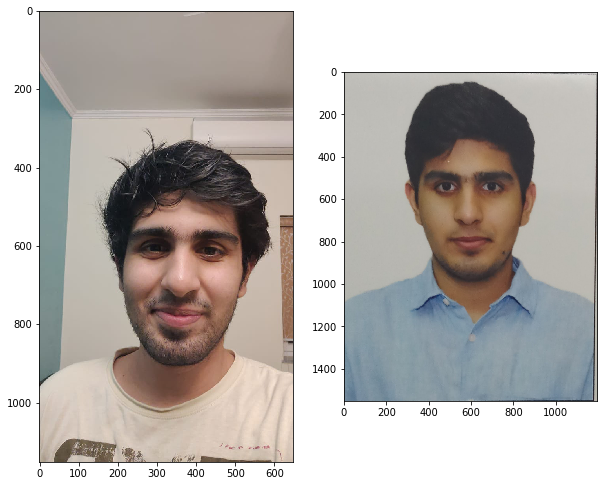



gungaya.jpeg Matched with gungaya.jpeg with 54.34%


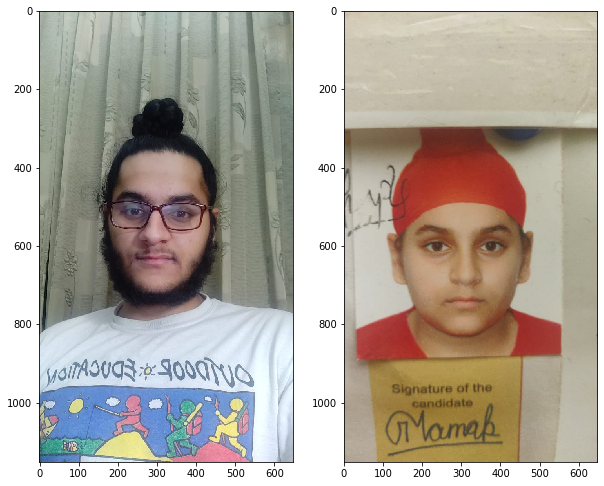



jhonny.jpg Matched with jhonny.jpg with 80.87%


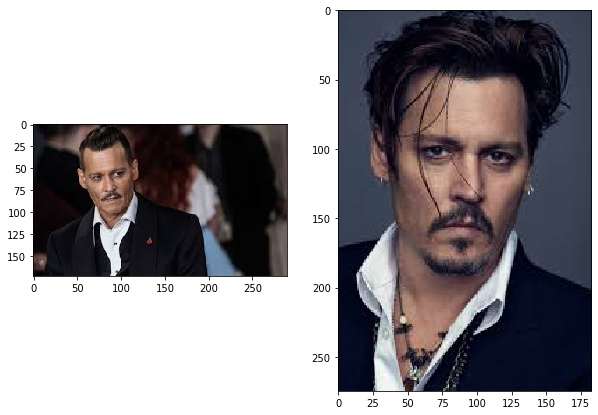



jushaan.jpeg Matched with jushaan.jpeg with 81.53%


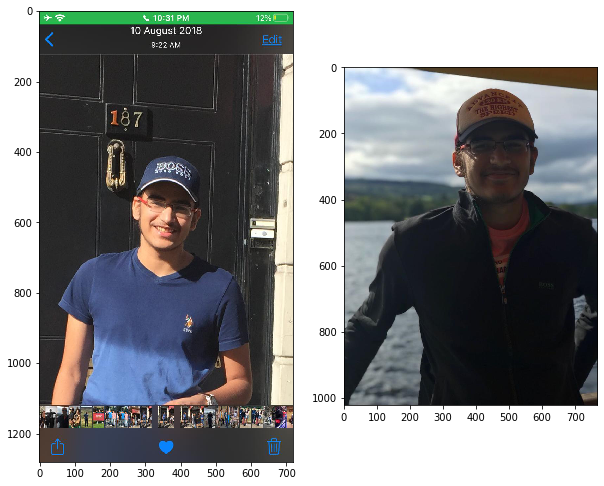



jushaan1.jpeg Matched with jushaan.jpeg with 62.16%


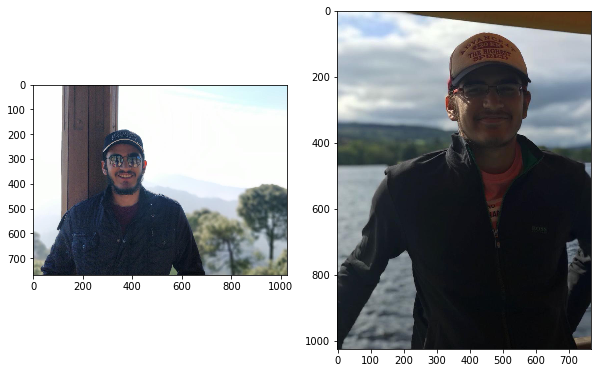



kin_jong_un.jpg Matched with kim_jong_un.jpg with 81.41%


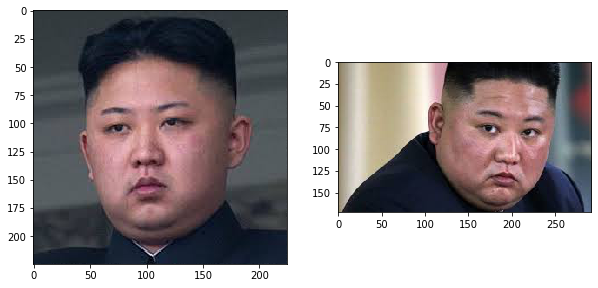



sk.jpg Matched with sk.jpg with 75.04%


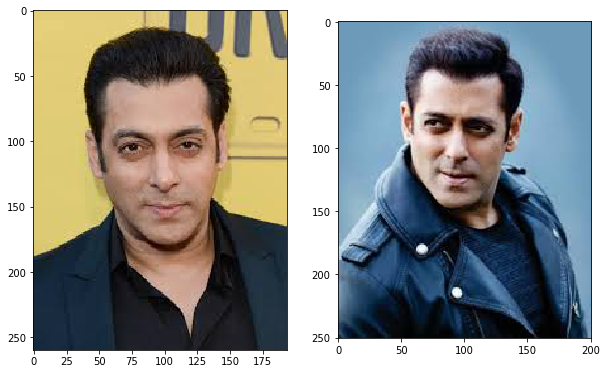



srk.jpg Matched with SRK.jpg.jpg with 82.61%


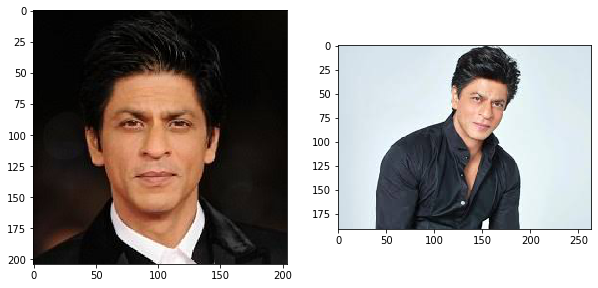



stark.jpg Matched with stark.jpg with 74.32%


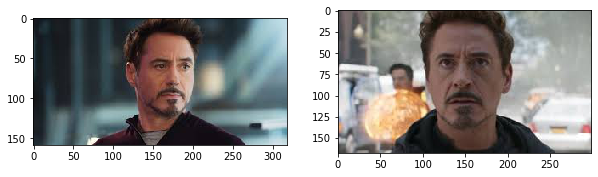



trump.jpg Matched with kim_jong_un.jpg with 33.54%


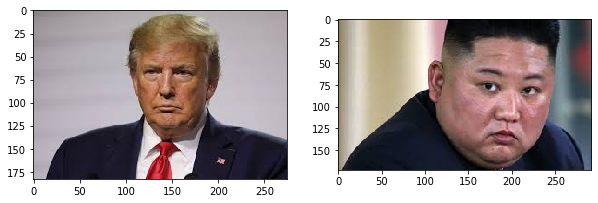

In [7]:
# define new photo embedding
n = int(input())
for f in os.listdir('./test/'):
    new_face = extract_face('./test/' + f)
    new_face = asarray(new_face, 'float32')
    new_face = preprocess_input(new_face, version=2)
    new_face = new_face.reshape(1,224,224,3)
    new_user_emb = model.predict(new_face)
    new_user_emb = new_user_emb.reshape(-1)

    # verify known photos of sharon
    ans = []
    for emb in embeddings:
        ans.append(cosine(emb,new_user_emb))
    index = np.argsort(ans)
    for i in range(0,n):
        per = (1-ans[index[i]])*100
        per = "{:.2f}".format(per)
        print('{} Matched with {} with {}%'.format(f, iden[index[i]],per))
        fig, ax = plt.subplots(1,2, figsize=(10, 10))
        pers = pyplot.imread('./test/' + f)
        matc = pyplot.imread('./dataset/' + iden[index[i]])
        ax[0].imshow(pers)
        ax[1].imshow(matc)
        plt.show()
    print('\n')